In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [303]:
df=pd.read_csv(r"C:\Users\PC\Desktop\data\apple_income_statement.csv")

In [305]:
df

,Unnamed: 0,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,Cash,0,0,0,0,0,0,0,0,0,0
1,Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
2,Short Term Investments,29,14,0,0,0,0,1,0,0,0
3,Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
4,"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477
5,"Total Receivables, Net",8831,17089,16726,15668,14441,16133,17417,17820,16780,17375
6,Total Inventory,15547,12625,12205,9700,8614,10018,11529,11266,11402,14038
7,"Other Current Assets, Total",11253,1626,1777,18,62,60,34,84,0,0
8,Total Current Assets,42138,38335,38867,33508,31967,36244,38603,39193,39464,43455
9,"Property/Plant/Equipment, Total - Gross",29932,0,31572,31977,31940,31538,29781,29841,29874,29496


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31 non-null     object
 1   2012-12-31  31 non-null     int64 
 2   2013-12-31  31 non-null     int64 
 3   2014-12-31  31 non-null     int64 
 4   2015-12-31  31 non-null     int64 
 5   2016-12-31  31 non-null     int64 
 6   2017-12-31  31 non-null     int64 
 7   2018-12-31  31 non-null     int64 
 8   2019-12-31  31 non-null     int64 
 9   2020-12-31  31 non-null     int64 
 10  2021-12-31  31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [311]:
# Cleaning the Data First :
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Unnamed: 0    0
2012-12-31    0
2013-12-31    0
2014-12-31    0
2015-12-31    0
2016-12-31    0
2017-12-31    0
2018-12-31    0
2019-12-31    0
2020-12-31    0
2021-12-31    0
dtype: int64

In [313]:
# Rename columns 
df.rename(columns={'Unnamed: 0': 'Metric'}, inplace=True)
df

,Metric,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,Cash,0,0,0,0,0,0,0,0,0,0
1,Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
2,Short Term Investments,29,14,0,0,0,0,1,0,0,0
3,Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
4,"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477
5,"Total Receivables, Net",8831,17089,16726,15668,14441,16133,17417,17820,16780,17375
6,Total Inventory,15547,12625,12205,9700,8614,10018,11529,11266,11402,14038
7,"Other Current Assets, Total",11253,1626,1777,18,62,60,34,84,0,0
8,Total Current Assets,42138,38335,38867,33508,31967,36244,38603,39193,39464,43455
9,"Property/Plant/Equipment, Total - Gross",29932,0,31572,31977,31940,31538,29781,29841,29874,29496


In [175]:
# Convert numeric columns to appropriate data types
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df

,Metric,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,Cash,0,0,0,0,0,0,0,0,0,0
1,Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
2,Short Term Investments,29,14,0,0,0,0,1,0,0,0
3,Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
4,"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477
5,"Total Receivables, Net",8831,17089,16726,15668,14441,16133,17417,17820,16780,17375
6,Total Inventory,15547,12625,12205,9700,8614,10018,11529,11266,11402,14038
7,"Other Current Assets, Total",11253,1626,1777,18,62,60,34,84,0,0
8,Total Current Assets,42138,38335,38867,33508,31967,36244,38603,39193,39464,43455
9,"Property/Plant/Equipment, Total - Gross",29932,0,31572,31977,31940,31538,29781,29841,29874,29496


In [315]:
df.set_index('Metric', inplace=True)
df

,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
Metric,,,,,,,,,,
Cash,0,0,0,0,0,0,0,0,0,0
Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
Short Term Investments,29,14,0,0,0,0,1,0,0,0
Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477
"Total Receivables, Net",8831,17089,16726,15668,14441,16133,17417,17820,16780,17375
Total Inventory,15547,12625,12205,9700,8614,10018,11529,11266,11402,14038
"Other Current Assets, Total",11253,1626,1777,18,62,60,34,84,0,0
Total Current Assets,42138,38335,38867,33508,31967,36244,38603,39193,39464,43455


In [317]:
# Identify relevant metrics for expenses calculation (assuming liabilities are expenses)
liability_metrics = [
    "Total Current Liabilities", 
    "Long Term Debt", 
    "Total Long Term Debt", 
    "Total Debt", 
    "Total Liabilities"
]

# Calculate total expenses for each year
total_expenses = df.loc[liability_metrics].sum()
print(total_expenses)


2012-12-31    196427
2013-12-31    182570
2014-12-31    190580
2015-12-31    178049
2016-12-31    170050
2017-12-31    172331
2018-12-31    178785
2019-12-31    180577
2020-12-31    177768
2021-12-31    185932
dtype: int64


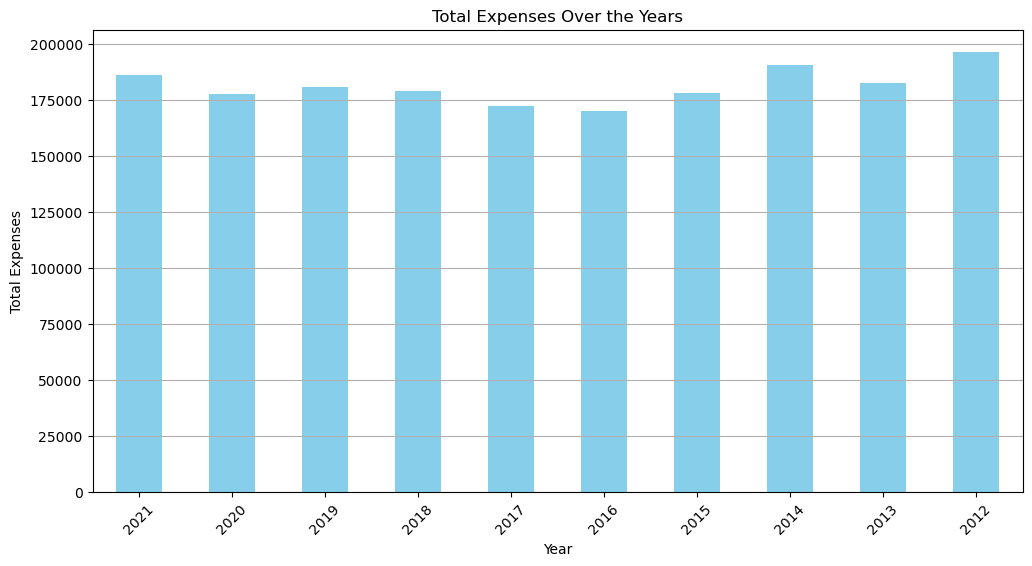

In [319]:
# providng insights on spending patterns.

# Plotting total expenses
plt.figure(figsize=(12, 6))

# Reverse the total_expenses series to start from the most recent year
total_expenses_reversed = total_expenses[::-1]

# Create the bar plot
total_expenses_reversed.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Total Expenses Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Expenses')

# Use only the year in x-ticks labels
plt.xticks(ticks=range(len(total_expenses_reversed)), labels=[str(year)[:4] for year in total_expenses_reversed.index], rotation=45)

# Add grid lines for better readability
plt.grid(axis='y')

# Show the plot
plt.show()


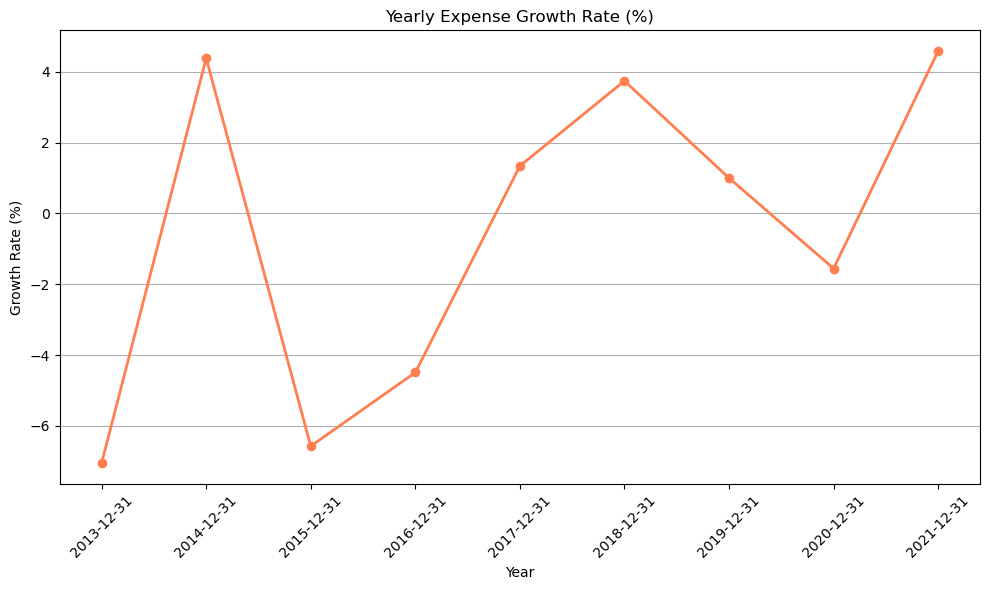

In [321]:
# for more insights , visualising growth rate:
# Calculate year-over-year percentage change
expense_growth_rate = total_expenses.pct_change() * 100

# Plot the growth rate using a line plot
plt.figure(figsize=(10, 6))
expense_growth_rate.plot(kind='line', marker='o', color='coral', linestyle='-', linewidth=2)

plt.title('Yearly Expense Growth Rate (%)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add markers for better visibility
plt.tight_layout()
plt.show()


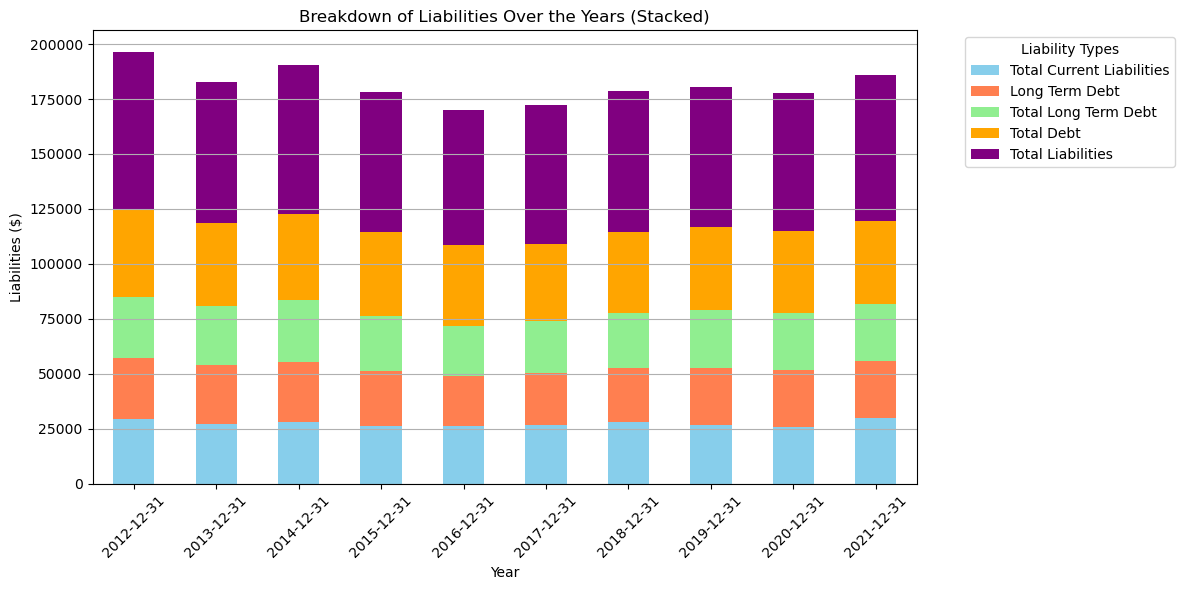

In [323]:
# Plot a stacked bar chart for the breakdown of liabilities over the years
df.loc[liability_metrics].T.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'coral', 'lightgreen', 'orange', 'purple'])

plt.title('Breakdown of Liabilities Over the Years (Stacked)')
plt.xlabel('Year')
plt.ylabel('Liabilities ($)')
plt.xticks(rotation=45)
plt.legend(title='Liability Types', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [325]:
# Recommendations for future expense :
# Defining threshold values 
threshold = 15000 
warning_threshold = 5000  

# Track whether any recommendations were made
recommendation_flag = False

# Recommendation based on average growth rate (if 'expense_growth_rate' exists)
if 'expense_growth_rate' in locals() and expense_growth_rate.mean() > 5:
    print("Recommendation: Expenses are growing at an average rate above 5%. Consider cost-cutting strategies in high-growth areas.")
    recommendation_flag = True

# Recommendation based on long-term debt
if df.loc["Long Term Debt"].mean() > threshold:
    print("Recommendation: Long term debt is consistently high. Focus on reducing debt burden.")
    recommendation_flag = True

# Recommendation based on other current liabilities
if df.loc["Other Current liabilities, Total"].max() > warning_threshold:
    print("Recommendation: Other current liabilities have exceeded the warning threshold. Consider measures to manage these liabilities.")
    recommendation_flag = True

# If no bad indicators were detected
if not recommendation_flag:
    print("Everything looks good! No critical issues detected.")


Recommendation: Long term debt is consistently high. Focus on reducing debt burden.


In [ ]:
# Predictive modeling for upcoming expenses
# Calculating total expenses for each year
total_expenses = df.loc[liability_metrics].sum()

# Ensuring that the index is a DatetimeIndex (if not, convert it)
if not pd.api.types.is_datetime64_any_dtype(total_expenses.index):
    total_expenses.index = pd.to_datetime(total_expenses.index)

# Step 1: Preparing the Data
years = np.array(range(len(total_expenses))).reshape(-1, 1)  # Year indices
expenses = total_expenses.values.reshape(-1, 1)  # Total expenses

# Step 2: Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(years, expenses, test_size=0.3, random_state=42)

# Step 3: Applying Polynomial Regression
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fiting the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 4: Predicting on the entire dataset for the regression curve
y_fit_poly = model.predict(poly.transform(years))

# Step 5: Predicting on the test set
y_pred_poly = model.predict(X_test_poly)

# Step 6: Visual Inspection of Predictions
year_labels = total_expenses.index.year.to_numpy()  # Extract the year from the index

# Plotting actual expenses
plt.figure(figsize=(12, 6))
plt.plot(year_labels, expenses, label='Actual Expenses', marker='o', color='blue', markersize=8)

# Plotting the polynomial regression curve
plt.plot(year_labels, y_fit_poly, label='Polynomial Regression Curve', color='green', linewidth=2)

# Plotting predicted expenses for testing years
plt.scatter(year_labels[X_test.flatten()], y_pred_poly, label='Predicted Expenses (Test)', color='red', marker='x', s=100)

# Get user input for the number of future years to predict
num_years = int(input("Enter the number of years to predict future expenses: "))

# Step 8: Predict future expenses for the specified number of years
future_years = np.array([[len(total_expenses) + i] for i in range(num_years)])  # Future year indices
future_years_poly = poly.transform(future_years)  # Transform future years for prediction
predicted_expenses = model.predict(future_years_poly)

# Print predicted expenses for each future year
for i in range(num_years):
    year = year_labels[-1] + (i + 1)
    estimated_price = predicted_expenses[i][0]
    print(f"{year}: Estimated Price: {estimated_price:.2f}")

# Adding future predictions to the plot
future_year_labels = [year_labels[-1] + i + 1 for i in range(num_years)]
predicted_expenses_full = np.concatenate([expenses.flatten(), predicted_expenses.flatten()])
combined_year_labels = np.concatenate([year_labels, future_year_labels])

plt.plot(combined_year_labels, predicted_expenses_full, label='Predicted Expenses (Future)', marker='x', linestyle='--', color='orange')

# Formatting the plot
plt.title('Actual vs. Predicted Expenses (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()
